In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = r'D:\Courses\Python\012_classification\classification_data.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [7]:
print('data = ')
print(data.head(10) )
print('data.describe = ')
print(data.describe())

data = 
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
data.describe = 
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [33]:
# classification data to postive 1 accepted or negative 0 refused
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

Text(0, 0.5, 'Exam 2 Score')

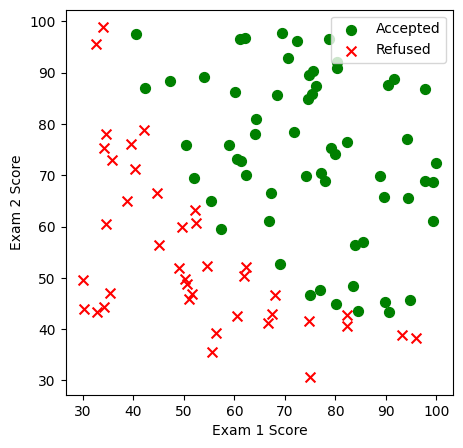

In [25]:
# draw data
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='g', marker='o',label='Accepted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Refused')
ax.legend(loc=1)
# loc = 1 => up right
# loc = 2 => up left
# loc = 3 => down left
# loc = 4 => down right
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


In [26]:
# sigmoid equation = h_theta
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

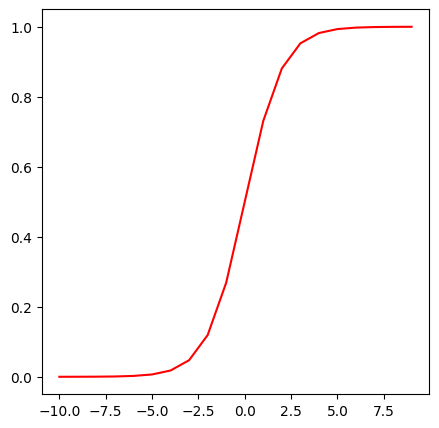

In [31]:
# create nums to draw graph sigmoid
nums = np.arange(-10, 10, step=1)
#  draw sigmoid
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [64]:
# set X (training data) and y (target variable)
cols = data.shape[1] # 4
X = data.iloc[ : , : cols-1]
y = data.iloc[ : , cols-1 : cols]

In [65]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3) 

In [51]:
print('X.shape = ' , X.shape)
print('y.shape = ' , y.shape)
print('theta.shape = ' , theta.shape)

X.shape =  (100, 3)
y.shape =  (100, 1)
theta.shape =  (3,)


In [70]:
def calc_cost(theta, X, y):
    theta = np.matrix(theta) # [[0. 0. 0.]]
    X = np.matrix(X) 
    y = np.matrix(y)
    '''
    # h_theta = 1 / (1 + np.exp(- theta.T * X) 
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    '''
    before_plus = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    after_plus = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(before_plus - after_plus) / (len(X))

cost = calc_cost(theta, X, y)
print('cost = ' , cost)

cost =  0.6931471805599453


In [81]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.shape[1]) # cols = 3
    grad = np.zeros(parameters)  # [0 , 0 , 0]
    # error = h_thata - y = Expected value - real value
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        row = np.multiply(error, X[:,i])
        grad[i] = np.sum(row) / len(X)
    return grad

In [80]:
import scipy.optimize as opt

In [ ]:
# best values for theta
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

In [ ]:
cost_after_optimize = cost(result[0], X, y)
print('cost after optimize = ' , cost_after_optimize)

In [ ]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [ ]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))